# Capstone Project – The Battle of Neighborhoods | Finding a Better Place in North York, Toronto

# 1. Installing and Importing Python Libraries and Dependencies

In [30]:
!pip install geocoder
!pip install folium

In [31]:
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


# 2. Data Extraction and Cleaning

Using BeautifulSoup Scraping List of Postal Codes of Given Wikipedia Page. Link: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [32]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
extracting_data = requests.get(url).text
wiki_data = BeautifulSoup(extracting_data, 'lxml')

In [33]:
column_names = ['Postalcode','Borough','Neighborhood']
toronto = pd.DataFrame(columns = column_names)

content = wiki_data.find('div', class_='mw-parser-output')
table = content.table.tbody
postcode = 0
borough = 0
neighborhood = 0

for tr in table.find_all('tr'):
    i = 0
    for td in tr.find_all('td'):
        if i == 0:
            postcode = td.text
            i = i + 1
        elif i == 1:
            borough = td.text
            i = i + 1
        elif i == 2: 
            neighborhood = td.text.strip('\n').replace(']','')
    toronto = toronto.append({'Postalcode': postcode,'Borough': borough,'Neighborhood': neighborhood},ignore_index=True)

In [34]:
# clean dataframe 
toronto = toronto[toronto.Borough!='Not assigned']
toronto = toronto[toronto.Borough!= 0]
toronto.reset_index(drop = True, inplace = True)
i = 0
for i in range(0,toronto.shape[0]):
    if toronto.iloc[i][2] == 'Not assigned':
        toronto.iloc[i][2] = toronto.iloc[i][1]
        i = i+1

In [35]:
df = toronto.groupby(['Postalcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df = df.replace('\n','', regex=True)
df.head()

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M1B,Scarborough,"Malvern, Rouge"
2,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
3,M1E,Scarborough,"Guildwood, Morningside, West Hill"
4,M1G,Scarborough,Woburn


In [36]:
df.describe()

,Postalcode,Borough,Neighborhood
count,180,180,180
unique,180,11,100
top,M3K,Not assigned,Not assigned
freq,1,77,77


In [37]:
df = df.dropna()
empty = 'Not assigned'
df = df[(df.Postalcode != empty ) & (df.Borough != empty) & (df.Neighborhood != empty)]

In [38]:

df.head()

,Postalcode,Borough,Neighborhood
1,M1B,Scarborough,"Malvern, Rouge"
2,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
3,M1E,Scarborough,"Guildwood, Morningside, West Hill"
4,M1G,Scarborough,Woburn
5,M1H,Scarborough,Cedarbrae


In [39]:
def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))
                    
grp = df.groupby(['Postalcode', 'Borough'])
df_2 = grp.apply(neighborhood_list).reset_index(name='Neighborhood')

In [40]:
df_2.describe()

,Postalcode,Borough,Neighborhood
count,103,103,103
unique,103,10,99
top,M3K,North York,Downsview
freq,1,24,4


In [41]:
print(df_2.shape)
df_2.head(100)

(103, 3)


,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [42]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('M4G')

[43.709020000000066, -79.36348999999996]

In [43]:
# Retrieving Postal Code Co-ordinates
postal_codes = df_2['Postalcode']    
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]

In [44]:
# Adding Columns Latitude & Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df_2['Latitude'] = df_coords['Latitude']
df_2['Longitude'] = df_coords['Longitude']

In [45]:
df_2[df_2.Postalcode == 'M2N']

,Postalcode,Borough,Neighborhood,Latitude,Longitude
22,M2N,North York,"Willowdale, Willowdale East",43.76774,-79.40728


In [46]:
df_2.head

<bound method NDFrame.head of     Postalcode           Borough  \
0          M1B       Scarborough   
1          M1C       Scarborough   
2          M1E       Scarborough   
3          M1G       Scarborough   
4          M1H       Scarborough   
5          M1J       Scarborough   
6          M1K       Scarborough   
7          M1L       Scarborough   
8          M1M       Scarborough   
9          M1N       Scarborough   
10         M1P       Scarborough   
11         M1R       Scarborough   
12         M1S       Scarborough   
13         M1T       Scarborough   
14         M1V       Scarborough   
15         M1W       Scarborough   
16         M1X       Scarborough   
17         M2H        North York   
18         M2J        North York   
19         M2K        North York   
20         M2L        North York   
21         M2M        North York   
22         M2N        North York   
23         M2P        North York   
24         M2R        North York   
25         M3A        North York  

# 3. Map of Toronto with Neighbourhoods Superimposed on top

In [25]:
map_North_York = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(df_2['Latitude'], df_2['Longitude'], df_2['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_North_York)  
    
map_North_York

In [47]:
df_2 = df_2[df_2['Borough'] == 'North York'].reset_index(drop=True)
df_2.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M2H,North York,Hillcrest Village,43.80225,-79.35558
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.78097,-79.34781
2,M2K,North York,Bayview Village,43.78112,-79.38060
3,M2L,North York,"York Mills, Silver Hills",43.75698,-79.38060
4,M2M,North York,"Willowdale, Newtonbrook",43.79182,-79.41372


In [48]:
address = 'North York,Toronto'

geolocator = Nominatim(user_agent="http")
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of North York,Toronto are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of North York,Toronto are 43.7543263, -79.44911696639593.


# As we did with all of Toronto City, let's visualizat North York the neighborhoods in it

In [50]:
map_North_York = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(df_2['Latitude'], df_2['Longitude'], df_2['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_North_York)  
    
map_North_York

In [51]:
address = 'North York,Toronto'

geolocator = Nominatim(user_agent="http")
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The Geograpical Co-ordinate of Neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Neighborhood_1 are 43.7543263, -79.44911696639593.


In [52]:
# @hiddel_cell
CLIENT_ID = '0OSYAAMGU5EPHSEV1BMY0QWG1EHTFFQ41F15QB4CNBGYN5XI' # my Foursquare ID
CLIENT_SECRET = 'TXDGZHDY4ZCPAIBTIOXATBEABTMHHPSQY1TFMZO3QXOWM1GT' # my Foursquare Secret
VERSION = '20201021'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0OSYAAMGU5EPHSEV1BMY0QWG1EHTFFQ41F15QB4CNBGYN5XI
CLIENT_SECRET: TXDGZHDY4ZCPAIBTIOXATBEABTMHHPSQY1TFMZO3QXOWM1GT


In [53]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [54]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc',
       'venue.location.neighborhood', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups'],
      dtype='object')

In [55]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# 4. Nearby Venues/Locations

In [56]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Grill Gate,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",43.753123,-79.451690
1,Wolfie's Deli,"[{'id': '4bf58dd8d48988d146941735', 'name': 'D...",43.754875,-79.442438
2,Tim Hortons,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",43.754767,-79.443250
3,Orly Restaurant & Grill,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",43.754493,-79.443507
4,Bagel Plus,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",43.755395,-79.440686


In [57]:
nearby_venues.shape

(11, 4)

In [58]:
nearby_venues.head(11)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Grill Gate,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",43.753123,-79.451690
1,Wolfie's Deli,"[{'id': '4bf58dd8d48988d146941735', 'name': 'D...",43.754875,-79.442438
2,Tim Hortons,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",43.754767,-79.443250
3,Orly Restaurant & Grill,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",43.754493,-79.443507
4,Bagel Plus,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",43.755395,-79.440686
5,Popeyes Louisiana Kitchen,"[{'id': '4d4ae6fc7a7b7dea34424761', 'name': 'F...",43.754671,-79.442740
6,Times Square Diner,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",43.751058,-79.455591
7,Pizza Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",43.755311,-79.441126
8,Wakame Sushi,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",43.755382,-79.440945
9,TTC Bus 84 Sheppard West,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",43.751970,-79.455324


# 5. Categories of Nearby Venues/Locations

In [59]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Grill Gate,Mediterranean Restaurant,43.753123,-79.451690
1,Wolfie's Deli,Deli / Bodega,43.754875,-79.442438
2,Tim Hortons,Coffee Shop,43.754767,-79.443250
3,Orly Restaurant & Grill,Middle Eastern Restaurant,43.754493,-79.443507
4,Bagel Plus,Restaurant,43.755395,-79.440686


In [60]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Pizza Place                  2
American Restaurant          1
Coffee Shop                  1
Mediterranean Restaurant     1
Middle Eastern Restaurant    1
Sushi Restaurant             1
Restaurant                   1
Bus Line                     1
Deli / Bodega                1
Fried Chicken Joint          1
Name: categories, dtype: int64

In [61]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [64]:
# Nearby Venues
North_York_venues = getNearbyVenues(names=df_2['Neighborhood'],
                                   latitudes=df_2['Latitude'],
                                   longitudes=df_2['Longitude']
                                  )

Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Bedford Park, Lawrence Manor East
Lawrence Manor, Lawrence Heights
Glencairn
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Humberlea, Emery


In [65]:
print('There are {} Uniques Categories.'.format(len(North_York_venues['Venue Category'].unique())))
North_York_venues.groupby('Neighborhood').count().head()

There are 129 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",12,12,12,12,12,12
Bayview Village,5,5,5,5,5,5
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Don Mills,52,52,52,52,52,52
Downsview,61,61,61,61,61,61


In [66]:
# one hot encoding
North_York_onehot = pd.get_dummies(North_York_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
North_York_onehot['Neighborhood'] = North_York_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [North_York_onehot.columns[-1]] + list(North_York_onehot.columns[:-1])
North_York_onehot = North_York_onehot[fixed_columns]
North_York_grouped = North_York_onehot.groupby('Neighborhood').mean().reset_index()
North_York_onehot.head(5)

,Neighborhood,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Bookstore,Boutique,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Lingerie Store,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Moving Target,Music Store,Nightclub,Park,Pet Store,Pharmacy,Photography Lab,Pizza Place,Platform,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Soccer Field,Spa,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Trail,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio
0,Hillcrest Village,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
num_top_venues = 5
for hood in North_York_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =North_York_grouped[North_York_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Bathurst Manor, Wilson Heights, Downsview North ----
                       venue  freq
0                Coffee Shop  0.17
1              Deli / Bodega  0.08
2        Fried Chicken Joint  0.08
3  Middle Eastern Restaurant  0.08
4                       Park  0.08


---- Bayview Village ----
              venue  freq
0       Gas Station   0.2
1       Flower Shop   0.2
2  Asian Restaurant   0.2
3             Trail   0.2
4              Park   0.2


---- Bedford Park, Lawrence Manor East ----
                venue  freq
0         Pizza Place  0.08
1  Italian Restaurant  0.08
2      Sandwich Place  0.08
3         Coffee Shop  0.08
4         Sports Club  0.04


---- Don Mills ----
                 venue  freq
0          Coffee Shop  0.10
1  Japanese Restaurant  0.06
2   Italian Restaurant  0.04
3         Intersection  0.04
4                 Bank  0.04


---- Downsview ----
                   venue  freq
0            Coffee Shop  0.10
1          Grocery Store  0.07
2            Pizza Plac

In [68]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# Most Common venues near neighborhood

In [69]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = North_York_grouped['Neighborhood']

for ind in np.arange(North_York_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(North_York_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Mediterranean Restaurant,Sushi Restaurant,Middle Eastern Restaurant,Fried Chicken Joint,Sandwich Place,Mobile Phone Shop,Restaurant,Park,Deli / Bodega
1,Bayview Village,Gas Station,Asian Restaurant,Trail,Flower Shop,Park,Yoga Studio,Falafel Restaurant,Food Court,Food & Drink Shop,Fast Food Restaurant
2,"Bedford Park, Lawrence Manor East",Pizza Place,Sandwich Place,Italian Restaurant,Coffee Shop,Sushi Restaurant,Butcher,Pub,Liquor Store,Sports Club,Restaurant
3,Don Mills,Coffee Shop,Japanese Restaurant,Dim Sum Restaurant,Restaurant,Gym,Beer Store,Supermarket,Bank,Sandwich Place,Electronics Store
4,Downsview,Coffee Shop,Grocery Store,Park,Fast Food Restaurant,Pizza Place,Vietnamese Restaurant,Beer Store,Pharmacy,Home Service,Shopping Mall


# K-Means Clustering Approach

In [70]:
# Using K-Means to cluster neighborhood into 3 clusters
North_York_grouped_clustering = North_York_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(North_York_grouped_clustering)
kmeans.labels_

array([0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2])

In [71]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

North_York_merged =df_2.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
North_York_merged = North_York_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

North_York_merged.head()# check the last columns!

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M2H,North York,Hillcrest Village,43.80225,-79.35558,2,Park,Bakery,Chinese Restaurant,Pharmacy,Residential Building (Apartment / Condo),Food & Drink Shop,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.78097,-79.34781,0,Clothing Store,Coffee Shop,Fast Food Restaurant,Women's Store,Juice Bar,Bakery,Shoe Store,Restaurant,Toy / Game Store,Cosmetics Shop
2,M2K,North York,Bayview Village,43.78112,-79.38060,2,Gas Station,Asian Restaurant,Trail,Flower Shop,Park,Yoga Studio,Falafel Restaurant,Food Court,Food & Drink Shop,Fast Food Restaurant
3,M2L,North York,"York Mills, Silver Hills",43.75698,-79.38060,2,Concert Hall,Park,Yoga Studio,Fried Chicken Joint,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Electronics Store
4,M2M,North York,"Willowdale, Newtonbrook",43.79182,-79.41372,0,Korean Restaurant,Middle Eastern Restaurant,Coffee Shop,Café,Pizza Place,Japanese Restaurant,Shopping Mall,Indian Restaurant,Gym,Grocery Store


In [72]:
North_York_merged.shape

(16, 16)

In [73]:
North_York_merged.head(16)

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M2H,North York,Hillcrest Village,43.80225,-79.35558,2,Park,Bakery,Chinese Restaurant,Pharmacy,Residential Building (Apartment / Condo),Food & Drink Shop,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.78097,-79.34781,0,Clothing Store,Coffee Shop,Fast Food Restaurant,Women's Store,Juice Bar,Bakery,Shoe Store,Restaurant,Toy / Game Store,Cosmetics Shop
2,M2K,North York,Bayview Village,43.78112,-79.38060,2,Gas Station,Asian Restaurant,Trail,Flower Shop,Park,Yoga Studio,Falafel Restaurant,Food Court,Food & Drink Shop,Fast Food Restaurant
3,M2L,North York,"York Mills, Silver Hills",43.75698,-79.38060,2,Concert Hall,Park,Yoga Studio,Fried Chicken Joint,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Electronics Store
4,M2M,North York,"Willowdale, Newtonbrook",43.79182,-79.41372,0,Korean Restaurant,Middle Eastern Restaurant,Coffee Shop,Café,Pizza Place,Japanese Restaurant,Shopping Mall,Indian Restaurant,Gym,Grocery Store
5,M2N,North York,"Willowdale, Willowdale East",43.76774,-79.40728,0,Coffee Shop,Japanese Restaurant,Pizza Place,Ramen Restaurant,Sandwich Place,Fast Food Restaurant,Café,Sushi Restaurant,Restaurant,Fried Chicken Joint
6,M2P,North York,York Mills West,43.74778,-79.40033,0,Coffee Shop,Park,Restaurant,Indian Restaurant,Golf Course,Convenience Store,Sandwich Place,Metro Station,Food Court,Business Service
7,M2R,North York,"Willowdale, Willowdale West",43.77989,-79.44678,0,Pizza Place,Pharmacy,Butcher,Coffee Shop,Park,Grocery Store,Yoga Studio,Electronics Store,Flower Shop,Fast Food Restaurant
8,M3A,North York,Parkwoods,43.75245,-79.32991,2,Park,Burger Joint,Pet Store,Food & Drink Shop,Yoga Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
9,M3B,North York,Don Mills,43.74923,-79.36186,0,Coffee Shop,Japanese Restaurant,Dim Sum Restaurant,Restaurant,Gym,Beer Store,Supermarket,Bank,Sandwich Place,Electronics Store


# Map of Clusters

In [74]:
kclusters = 10

In [75]:
# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(North_York_merged['Latitude'], 
                                   North_York_merged['Longitude'], 
                                   North_York_merged['Neighborhood'], 
                                   North_York_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [76]:
df1=North_York_merged.loc[North_York_merged['Cluster Labels'] == 0,North_York_merged.columns[[2] + list(range(5, North_York_merged.shape[1]))]]
df2=North_York_merged.loc[North_York_merged['Cluster Labels'] == 1,North_York_merged.columns[[2] + list(range(5, North_York_merged.shape[1]))]]
df3=North_York_merged.loc[North_York_merged['Cluster Labels'] == 2,North_York_merged.columns[[2] + list(range(5, North_York_merged.shape[1]))]]

In [80]:
North_York_Avg_HousingPrice=pd.DataFrame({"Neighborhood":df_2["Neighborhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,
                                                               
                                                              
                                                              ]})

In [81]:
North_York_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

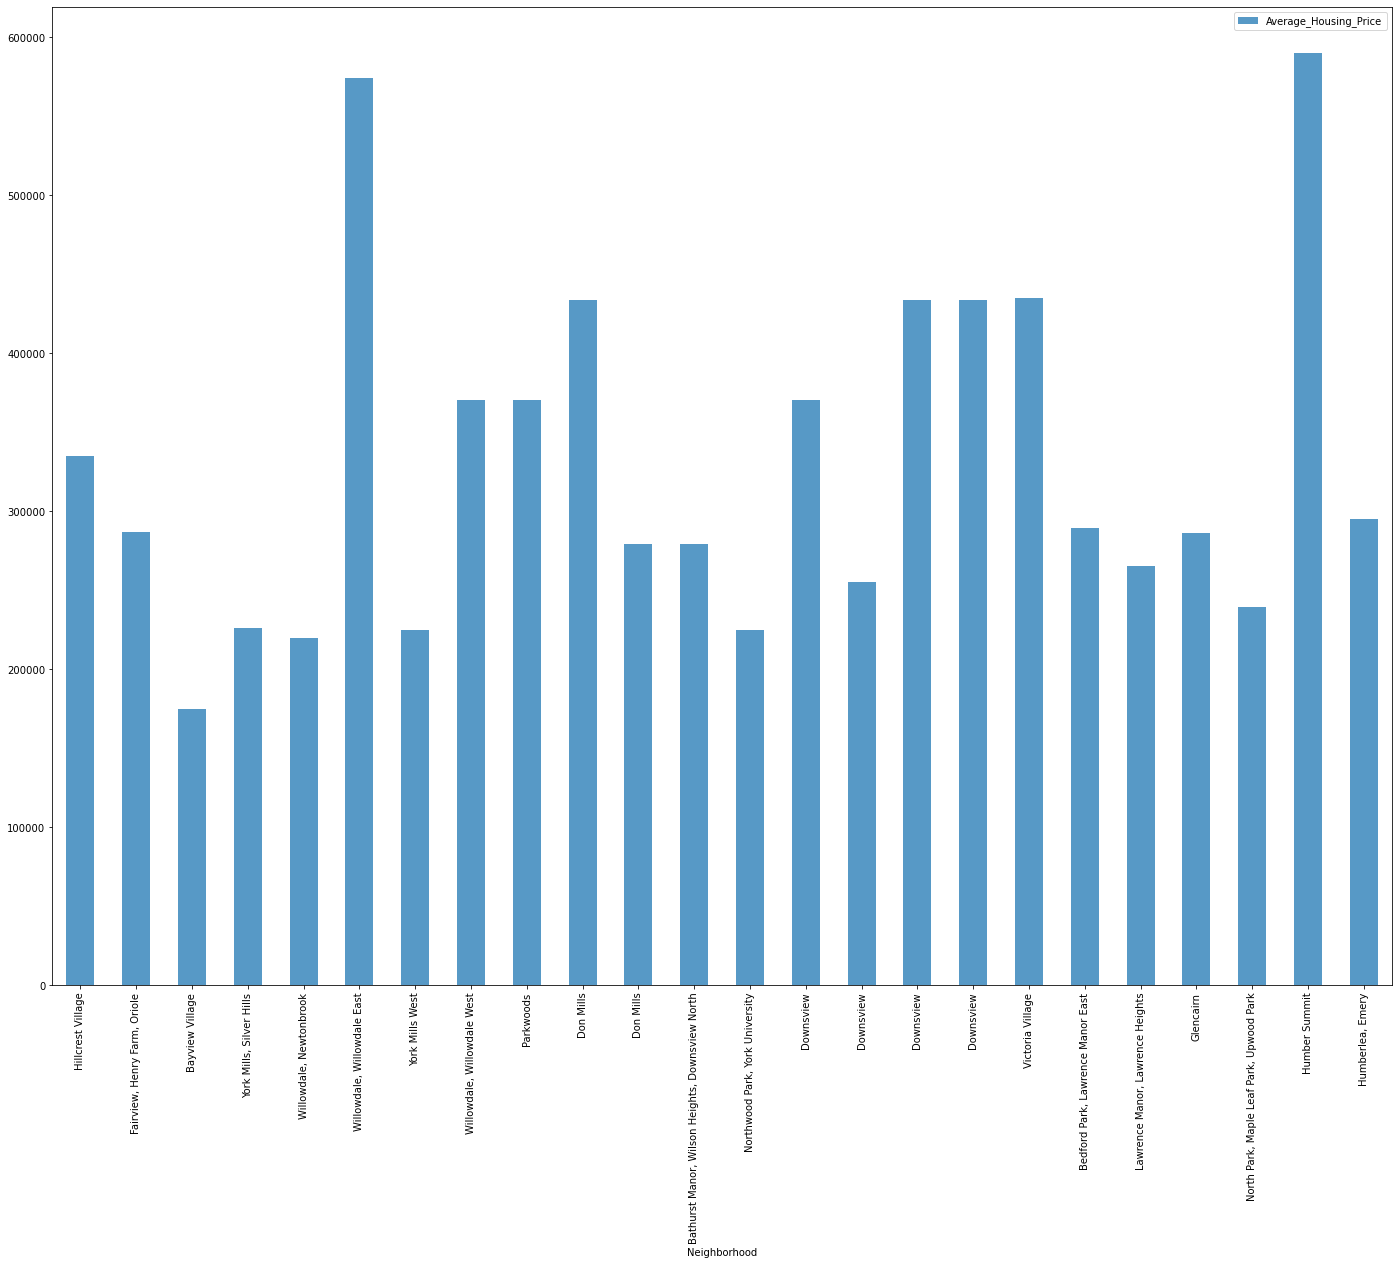

In [82]:
North_York_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

# School Rating by Clusters

In [83]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster4":df3["Neighborhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [84]:
new_North_York=North_York_merged.set_index("Neighborhood",drop=True)
#Source:https://www.greatschools.org
North_York_school_ratings=pd.DataFrame({"Neighborhood":df["Neighborhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
                                                           8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7
                                                           ]})

In [85]:
North_York_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

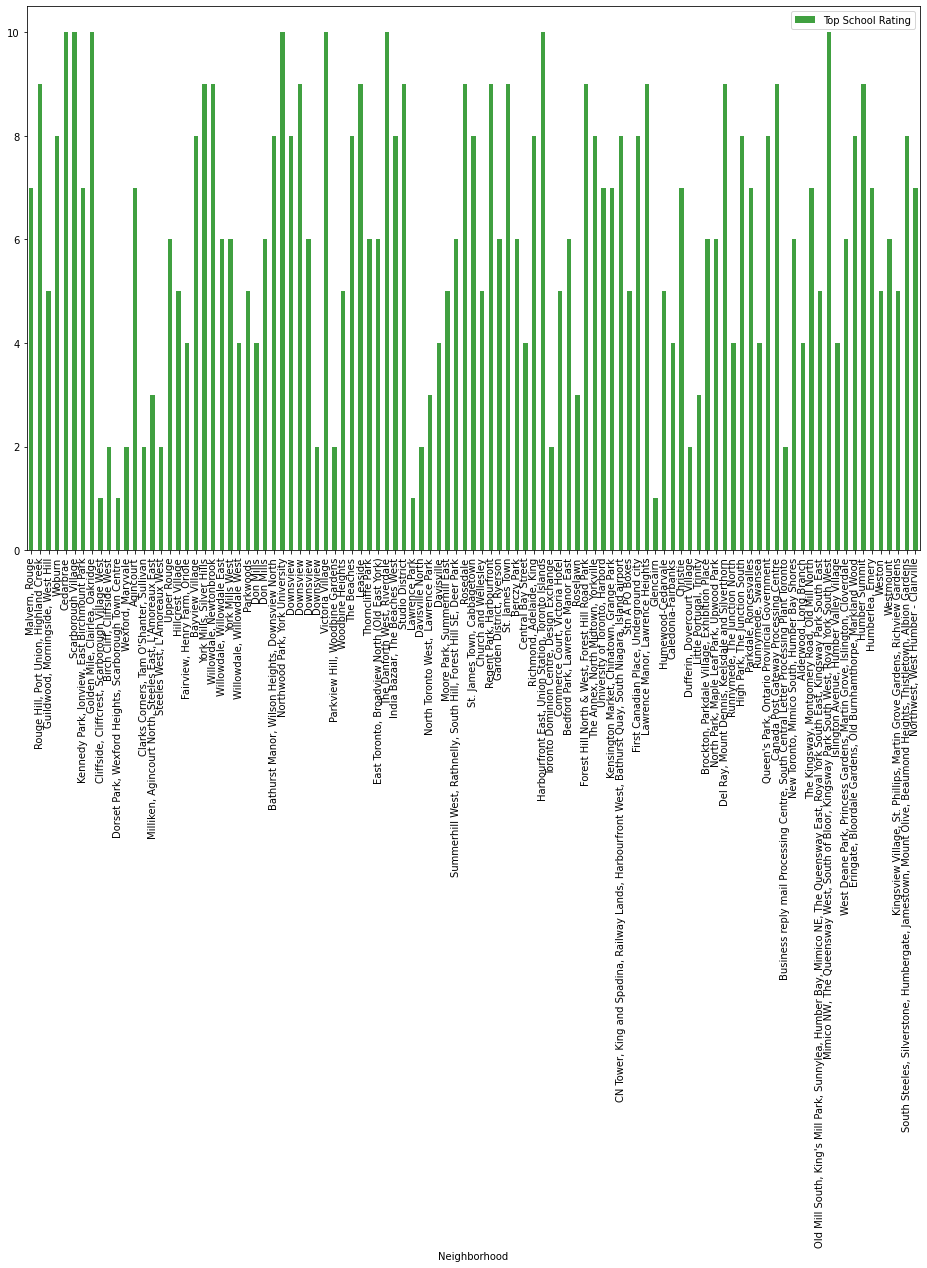

In [86]:
North_York_school_ratings.plot(kind='bar',figsize=(16,10),color='green',alpha=0.75);

Conclusion: In this project, using k-means cluster algorithm I separated the neighborhood into 10(Ten) different clusters and for 103 different lattitude and logitude from dataset, which have very-similar neighborhoods around them. Using the charts above results presented to a particular neighborhood based on average house prices and school rating have been made